# ***Building Logistic regression and performing various analysis  on two datasets 'Weekly' and 'Auto'.***

# ***Table of content***


>[Building Logistic regression and performing various analysis  on two datasets 'Weekly' and 'Auto'.](#scrollTo=O2pOmRc2SroQ)

>>[Considering 'Weekly' dataset](#scrollTo=LyVgMInwSrrU)

>>>[Objectives](#scrollTo=LyVgMInwSrrU)

>>[Considering 'Auto' dataset](#scrollTo=LyVgMInwSrrU)

>>>[Objectives](#scrollTo=LyVgMInwSrrU)

>[Weekly dataset](#scrollTo=11Y8GzhHB5gN)

>>[Produce some numerical and graphical summaries of the weekly data. Do there appear to be any patterns.](#scrollTo=tH7K93Ls8wkq)

>>[Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?](#scrollTo=eKEZ_LHOKDw1)

>>[Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.](#scrollTo=8UU82B1X_NFn)

>>[Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).](#scrollTo=XmvQ3bKn_5i-)

>>[Repeat (4) using KNN with k=1](#scrollTo=Xj8sV-0DBC5W)

>>[Repeat (4) using Naive Bayes](#scrollTo=iv7gDSyRBYho)

>>[Which of these methods appear to provide the best results on this data.](#scrollTo=YrEfih6tBl81)

>[Auto dataset](#scrollTo=ehAdKFXUCI50)

>>[Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() method of the data frame. Note you may fnd it helpful to add a column mpg01 to the data frame by assignment.](#scrollTo=yQdZtafZC547)

>>[Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.](#scrollTo=yE5Ybg5yDOb0)

>>[Split the data into a training set and a test set.](#scrollTo=op5zmKhvDkQr)

>>[Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (2). What is the test error of the model obtained?](#scrollTo=C_zgtQ1JD00g)

>>[Perform naive Bayes on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (2). What is the test error of the model obtained?](#scrollTo=irgFseiGE5kB)

>>[Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (2). What test errors do you obtain? Which value of K seems to perform the best on this data set?](#scrollTo=yYl0VsojFQri)

>>[Conclusion for which k-value is better](#scrollTo=goGV6nLsoQM2)



Weekly Dataset:

https://drive.google.com/file/d/1UbTMReUFCG9BbtDlhYiHZBpyL1uIA-jP/view?usp=sharing

Auto Dataset:

https://drive.google.com/file/d/1UfsquWzT_tPGNfqx8CDIS5dT0mxGVDUZ/view?usp=sharing

## ***Considering 'Weekly' dataset***

### *Objectives*
1.  Produce some numerical and graphical summaries of the Weekly
data. Do there appear to be any patterns?

2. Use the full dataset to perform a logistic regression with
'Direction' as the response and the five lag variables, 'Volume'
as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically signifcant? If so,
which ones?

3. Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

4.  Now fit the logistic regression model using a training data period from 1990 to 2008, with 'Lag2' as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

5.  Repeat (4) using KNN with K = 1

6. Repeat (4) using Naive Bayes.

7. Which of these method appear to provide the best results on this data.

## ***Considering 'Auto' dataset***

### *Objectives*

1. Create a binary variable, 'mpg01' that contains a 1 if mpg has a value above its median, and a 0 if mpg contains a value below
its median. You can compute the median using the median() method of the data frame. Note you may fnd it helpful to add a column 'mpg01' to the data frame by assignment. Assuming you
have stored the data frame as Auto, this can be done as follows:\
Auto['mpg01'] = mpg01

2.  Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other
features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

3.  Split the data into a training set and a test set.

4.  Perform logistic regression on the training data in order to predict 'mpg01' using the variables that seemed most associated with
mpg01 in (2). What is the test error of the model obtained?

5. Perform Naive Bayes on the training data in order to predict' mpg01' using the variables that seemed most associated with mpg01
in (2). What is the test error of the model obtained?

6. Perform KNN on the training data, with several values of K, in order to predict 'mpg01'. Use only the variables that seemed most
associated with mpg01 in (2). What test errors do you obtain? Which value of K seems to perform the best on this data set?



We mount the google drive to import the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# ***Weekly dataset***

In [ ]:
Data = pd.read_csv("/content/drive/MyDrive/SML/Datasets/Weekly.csv")
Data

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [ ]:
Data.head(10)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
5,1990,1.178,0.712,3.514,-2.576,-0.270,0.154444,-1.372,Down
6,1990,-1.372,1.178,0.712,3.514,-2.576,0.151722,0.807,Up
7,1990,0.807,-1.372,1.178,0.712,3.514,0.132310,0.041,Up
8,1990,0.041,0.807,-1.372,1.178,0.712,0.143972,1.253,Up
9,1990,1.253,0.041,0.807,-1.372,1.178,0.133635,-2.678,Down


We see that the dataset has, different years with 5 lags along with volume and direction.

In [ ]:
Data.shape

(1089, 9)

The data has 1089 rows and 9 columns i.e 9 variables of interest.

## ***Produce some numerical and graphical summaries of the weekly data. Do there appear to be any patterns.***

In [ ]:
Data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


From the above statistical summary we infer that,
1. The means of lag 1, lag 2, lag 3, lag 4, lag5 are 0.15, 0.15, 0.147, 0.1458, 0.1398 respectively.
2. The minimum of all 5 lags are same being -18.1950.
3. The maximum value of volume of shares traded each week is 9.3282.

Text(0.5, 0.98, 'Pairplot: Numerical Features ')

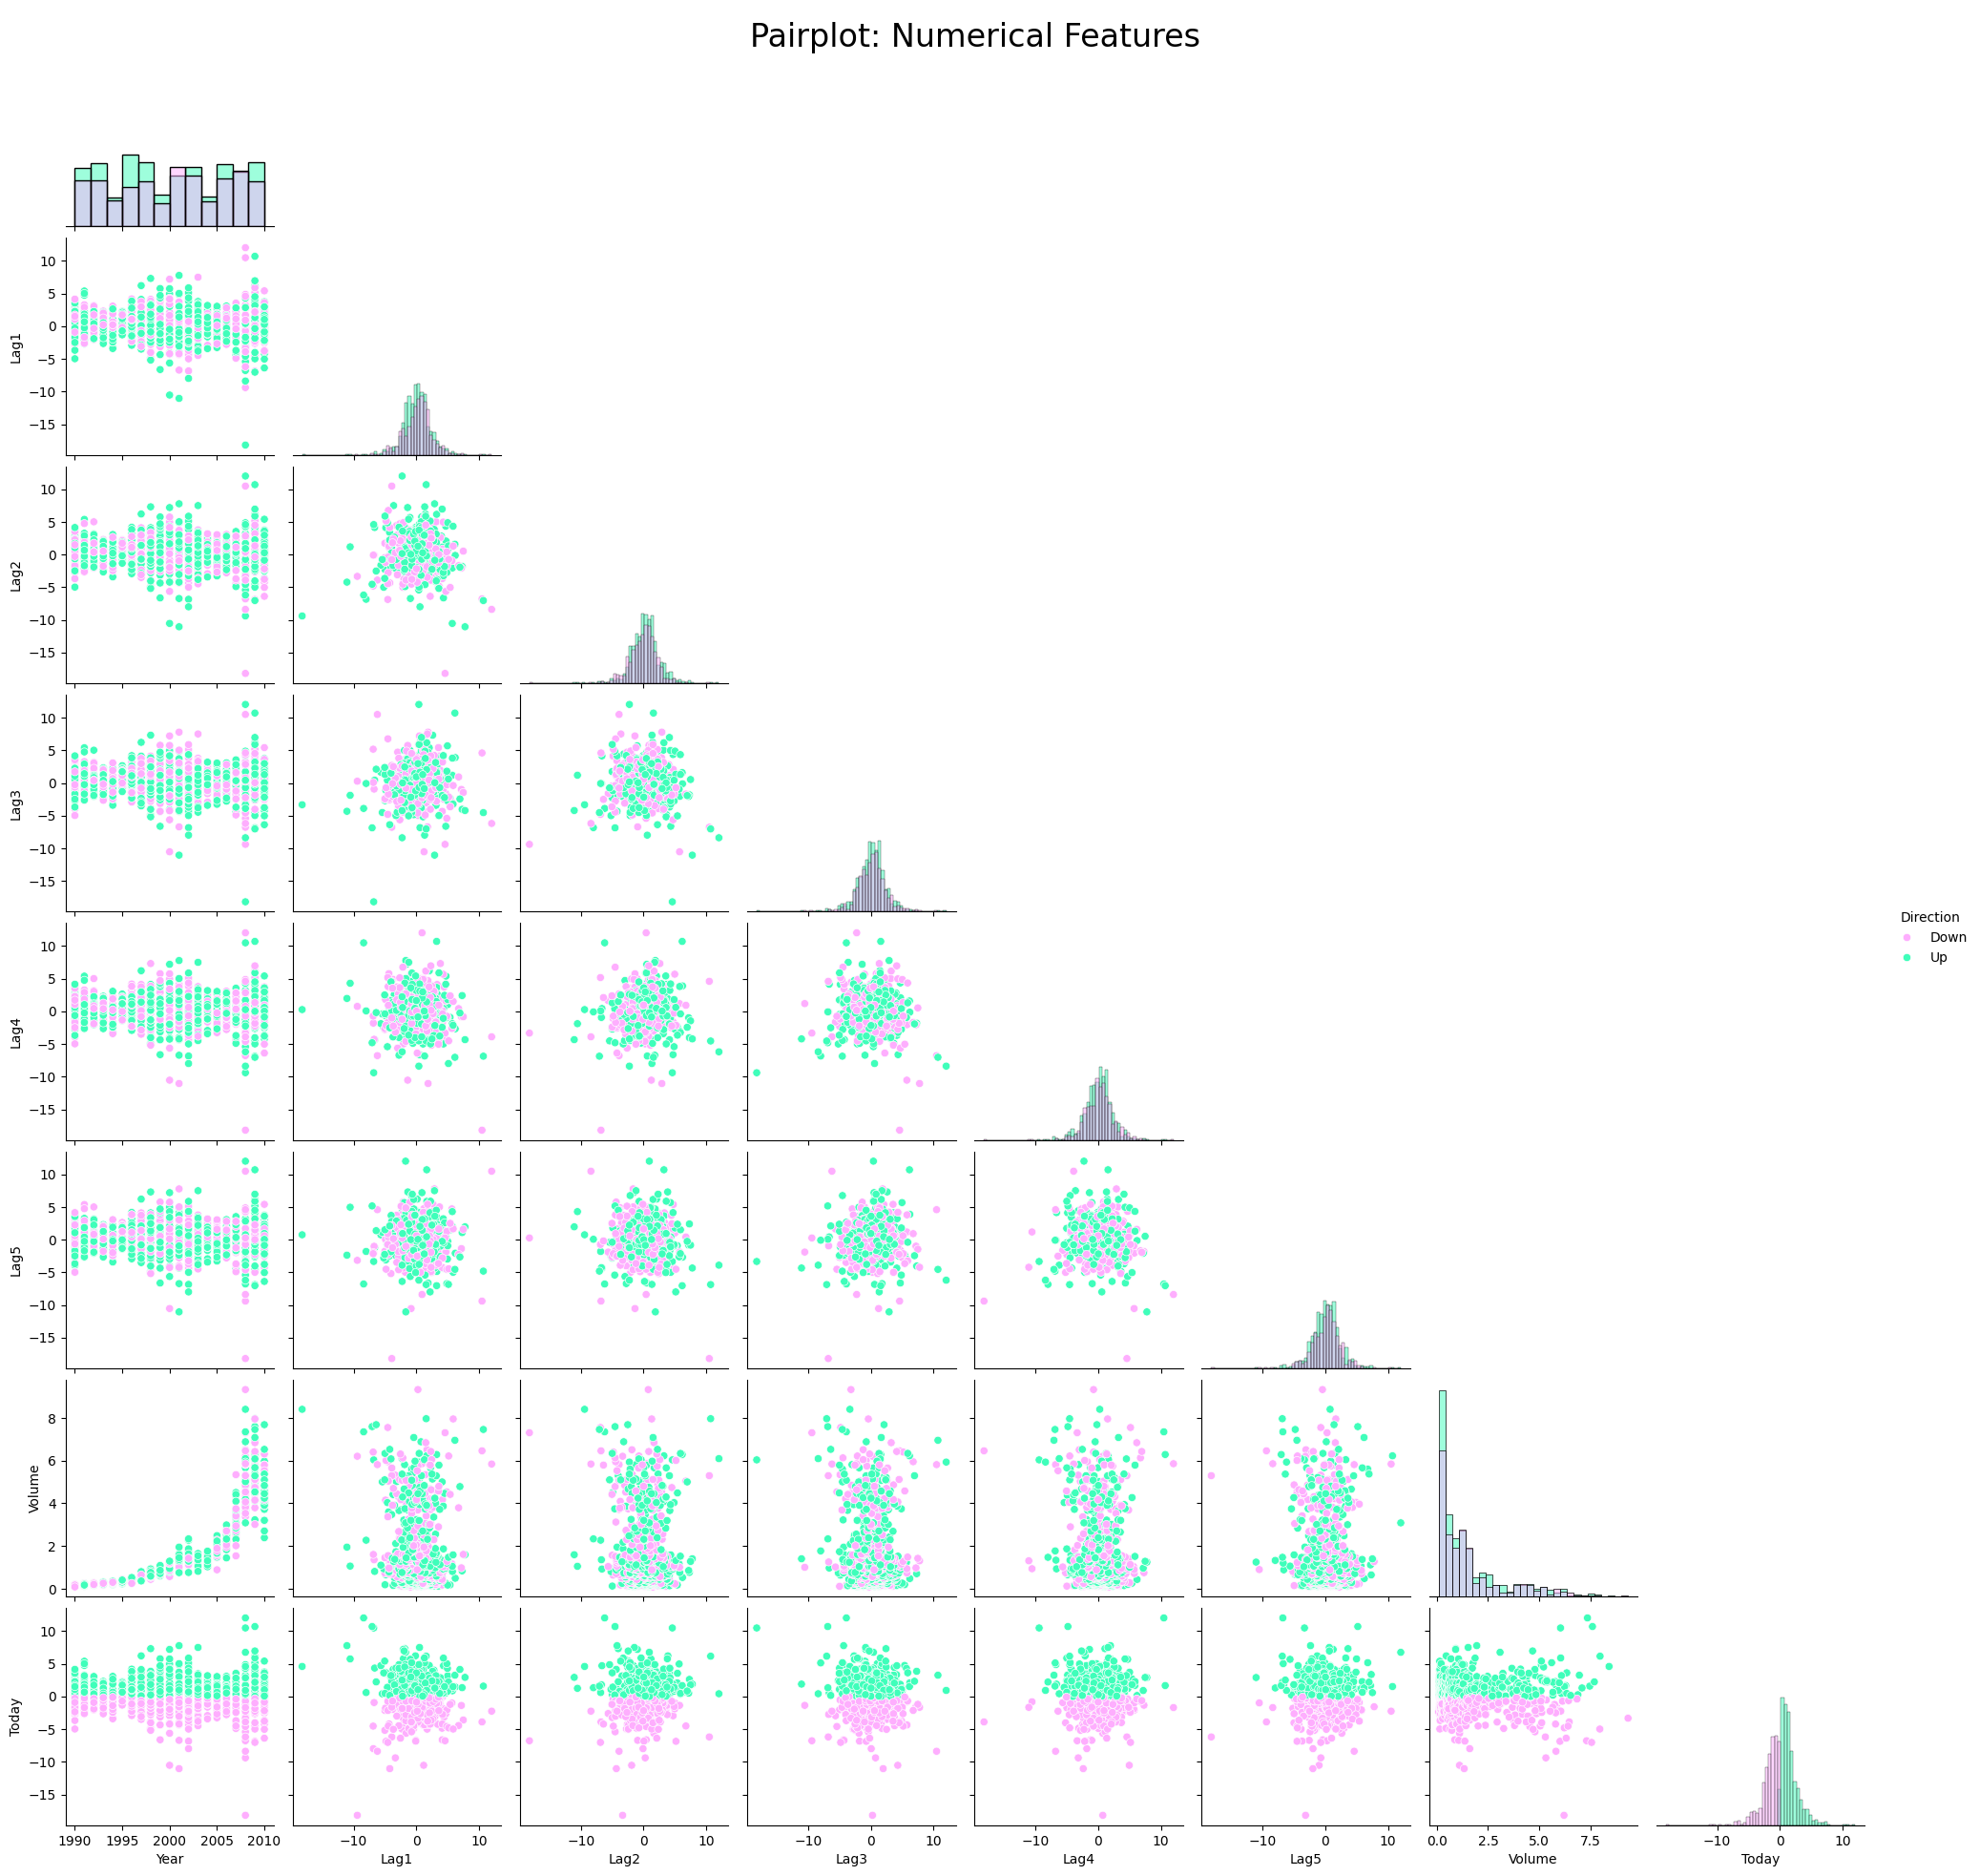

In [ ]:
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']
_ = ['Year', 'Lag1', 'Lag2','Lag3','Lag4','Lag5', 'Volume','Today','Direction']
Data_ = Data[_]
g = sns.pairplot(Data_, hue="Direction", corner=True, diag_kind='hist', palette=mypal[1::4]);
plt.suptitle('Pairplot: Numerical Features ' ,fontsize = 24)

From the initial summary statistics and scatterplot matrix, there don't appear to be any obvious patterns aside from the fact the volume of shares traded each week has grown quite a lot from 1990 to 2010. Looking more closely at the scatterplot of just volume over time, we can see that the number of shares traded each week has grown exponentially over the 21 years covered by the data.

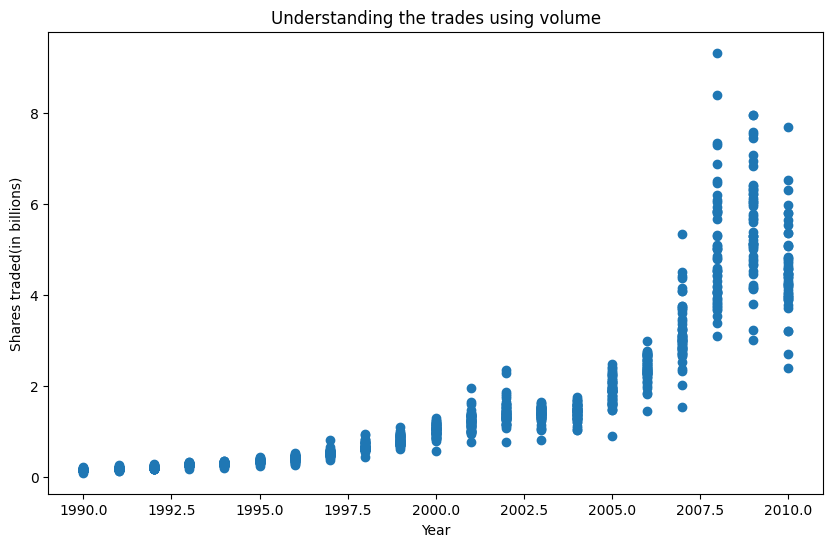

In [ ]:
colors = ['blue']
plt.figure(figsize=(10, 6))
plt.scatter(x='Year', y='Volume',data=Data)
plt.title('Understanding the trades using volume')
plt.xlabel('Year')
plt.ylabel('Shares traded(in billions)')
plt.show()

The number of shares traded each week has grown exponentially over the 21 years covered by the data.

Here the x-axis shows the time and y-axis is the volume of traded share weekly in billions.

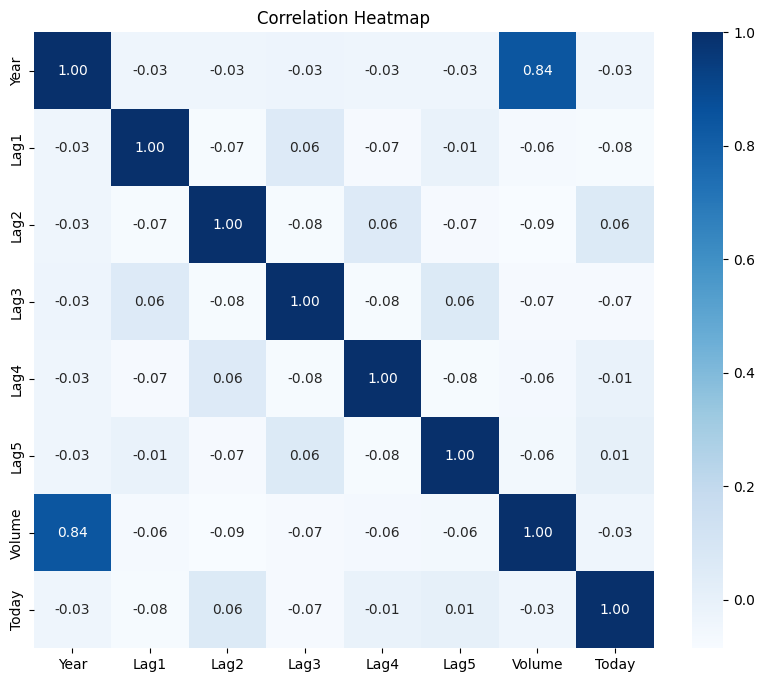

In [ ]:
correlation_matrix = Data.corr(numeric_only = True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Lastly, we look at the matrix of correlations between the variables.

Looking at the last row, we can see that each of the lag variables is only correlated very weakly with today's returns.

The sole substantial value of 0.84, between Volume and Year, aligns with the strong correlation we saw in the above scatterplot.

## ***Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?***

First we do the mapping of the varible of interest in order to convert the categorical variable to binary values here.

In [ ]:
direction_set=set(Data['Direction'])
Data['Direction']=Data['Direction'].map({'Down':0,'Up':1}).astype(int)
print(Data.head)

<bound method NDFrame.head of       Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today  Direction
0     1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270          0
1     1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576          0
2     1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514          1
3     1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712          1
4     1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178          1
...    ...    ...    ...    ...    ...    ...       ...    ...        ...
1084  2010 -0.861  0.043 -2.173  3.599  0.015  3.205160  2.969          1
1085  2010  2.969 -0.861  0.043 -2.173  3.599  4.242568  1.281          1
1086  2010  1.281  2.969 -0.861  0.043 -2.173  4.835082  0.283          1
1087  2010  0.283  1.281  2.969 -0.861  0.043  4.454044  1.034          1
1088  2010  1.034  0.283  1.281  2.969 -0.861  2.707105  0.069          1

[1089 rows x 9 columns]>


Now, we segregate the dataset. That is, we do the splitting of the data to fit a logistic regression.

In [ ]:
X = Data[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']]
X

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,0.816,1.572,-3.936,-0.229,-3.484,0.154976
1,-0.270,0.816,1.572,-3.936,-0.229,0.148574
2,-2.576,-0.270,0.816,1.572,-3.936,0.159837
3,3.514,-2.576,-0.270,0.816,1.572,0.161630
4,0.712,3.514,-2.576,-0.270,0.816,0.153728
...,...,...,...,...,...,...
1084,-0.861,0.043,-2.173,3.599,0.015,3.205160
1085,2.969,-0.861,0.043,-2.173,3.599,4.242568
1086,1.281,2.969,-0.861,0.043,-2.173,4.835082
1087,0.283,1.281,2.969,-0.861,0.043,4.454044


In [ ]:
Y = Data['Direction']
Y

0       0
1       0
2       1
3       1
4       1
       ..
1084    1
1085    1
1086    1
1087    1
1088    1
Name: Direction, Length: 1089, dtype: int64

We fit a logistic regression model considering all the lags and volume as independent variables and direction as the dependent variable.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.intercept_

array([0.33131881])

We infer from the above intercept as the average direction probability is 0.3313

In [ ]:
model.coef_

array([[-0.02481819,  0.07760263, -0.0216888 , -0.02966746, -0.02463095,
        -0.05214189]])

The coeffcients are
1. B1 for lag 1 is -0.0248. That is other dependent variables being zero, the unit change in lag 1 decreases the direction probability by -0.0248
2. B2 for lag 2 is 0.0776. That is other dependent variables being zero, the unit change in lag 2 increases the direction probability by 0.0776
3. B3 for lag 3 is -0.0217. That is other dependent variables being zero, the unit change in lag 3 decreases the direction probability by -0.0217
4. B4 for lag 4 i -0.0297. That is other dependent variables being zero, the unit change in lag 4 decreases the direction probability by -00297.

Similary we can infer from the other variables.

## ***Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.***

Confusion Matrix: 
[[ 19 108]
 [ 23 123]]
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.15      0.22       127
           1       0.53      0.84      0.65       146

    accuracy                           0.52       273
   macro avg       0.49      0.50      0.44       273
weighted avg       0.50      0.52      0.45       273

Accuracy of the Model: 52.01465201465202%


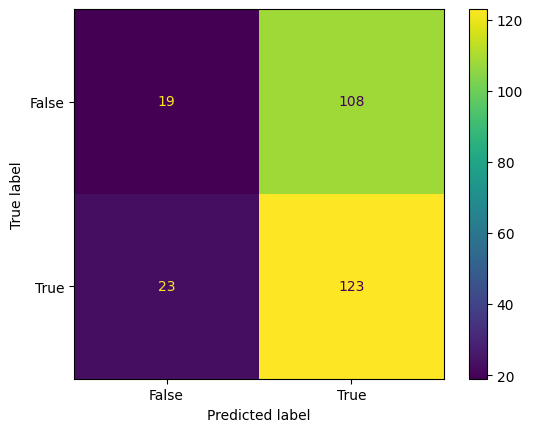

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ")
print(cm)
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['False','True'])
cm_display.plot()

Accuracy is a common evaluation metric used to measure the overall performance of a classification model. It represents the proportion of correctly classified instances out of the total instances evaluated. The accuracy of our model is 52%.

Here, note that, in the confusion matrix, ***False*** is 'down' and ***True*** is 'up'

The confusion matrix tells us that:

The true positive is 123, that is, 123 directions are up and are correctly predicted to be up.

The false positive is 108, that is, 108 directions are down and are wrongly predicted to be up.

The false negative is 23, that is, 23 directions are up but are wrongly predicted to be down.

The true negative is 19, that is, 19 directions are down and are correctly predicted to be down.

## ***Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).***

In [ ]:
train = Data.loc[Data['Year'] <= 2008]
test = Data.loc[Data['Year'] >= 2009]

X = train[['Lag2']]
y = train['Direction']

In [ ]:
from sklearn.metrics import confusion_matrix

X_train1 ,X_test1 ,y_train1 ,y_test1 = train_test_split(X,y,test_size=0.25,random_state=0)

LR= LogisticRegression()
LR.fit(X_train1,y_train1)
y_pred_lr = LR.predict(X_test1)

print('Confusion Matrix:\n ',confusion_matrix(y_test1,y_pred_lr))
print('Classification Report:\n ',classification_report(y_test1,y_pred_lr))


Confusion Matrix:
  [[  9  96]
 [ 13 129]]
Classification Report:
                precision    recall  f1-score   support

           0       0.41      0.09      0.14       105
           1       0.57      0.91      0.70       142

    accuracy                           0.56       247
   macro avg       0.49      0.50      0.42       247
weighted avg       0.50      0.56      0.46       247



The accuracy of the model is 56%.

The confusion matrix tells us that:

The true positive is 129, that is, 129 directions are up and are correctly predicted to be up.

The false positive is 96, that is, 96 directions are down and are wrongly predicted to be up.

The false negative is 13, that is, 13 directions are up but are wrongly predicted to be down.

The true negative is 9, that is, 9 directions are down and are correctly predicted to be down.

## ***Repeat (4) using KNN with k=1***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(train[['Lag2']], train['Direction'])
y_predict = neigh.predict(test[['Lag2']])

print("\t\t Confusion Matrix")
print("\t Down Up(Predicted)")
print("Down \t" + str(confusion_matrix(y_true=test['Direction'], y_pred=y_predict)[0]))
print("Up \t" + str(confusion_matrix(y_true=test['Direction'], y_pred=y_predict)[1]))

		 Confusion Matrix
	 Down Up(Predicted)
Down 	[22 21]
Up 	[32 29]


Usinf KNN, we infer that

We have predicted that:

There are 22 downs which are correctly predicted as downs.

There are 21 downs which are wrongly predicted as ups.

There are 32 ups which are wrongly predicted as downs.

We have 29 ups which are correctly predicted as ups.

## ***Repeat (4) using Naive Bayes***

In [ ]:
from sklearn.naive_bayes import GaussianNB


X_knn = train[['Lag2']]
y_knn = train['Direction']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size = 0.25, random_state=0)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on dataset which model has not seen before
gnb_pred= gnb.predict(X_test)

print('Confusion Matrix:\n ',confusion_matrix(y_test,gnb_pred))
print('Classification Report:\n ',classification_report(y_test,gnb_pred))

Confusion Matrix:
  [[34 71]
 [44 98]]
Classification Report:
                precision    recall  f1-score   support

           0       0.44      0.32      0.37       105
           1       0.58      0.69      0.63       142

    accuracy                           0.53       247
   macro avg       0.51      0.51      0.50       247
weighted avg       0.52      0.53      0.52       247



We use Naive Bayes procedure and see that

The accuracy of the model is 53%.

From the confusion matrix we infer:

The true positive is 98, that is, 98 directions are up and are correctly predicted to be up.

The false positive is 71, that is, 71 directions are down and are wrongly predicted to be up.

The false negative is 44, that is, 44 directions are up but are wrongly predicted to be down.

The true negative is 34, that is, 34 directions are down and are correctly predicted to be down.



## ***Which of these methods appear to provide the best results on this data.***

The ***logistic regression model*** using a training data period from 1990 to 2008, ***with Lag2 as the only predictor*** appears to be a ***better model*** for the dataset as it has a better ***precision of 56%.***

If looked into the whole dataset, we see that Naive Bayes procedure has a higher precision of 53% when compared to others.

# ***Auto dataset***

We import the dataset from drive.

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/SML/Datasets/Auto.csv")
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
data.dropna(inplace=True)
data = data[data['horsepower'] != '?']
data['horsepower'] = data['horsepower'].astype(int)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## ***Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() method of the data frame. Note you may fnd it helpful to add a column mpg01 to the data frame by assignment.***

In [ ]:
data['mpg01'] = np.where(data['mpg']>=data['mpg'].median(), 1, 0)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


We see that there is a seperate column which takes binary values of 0 and 1.

0 is assigned for the observations which are below the median and 1 for the observations which are above the median.

## ***Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.***

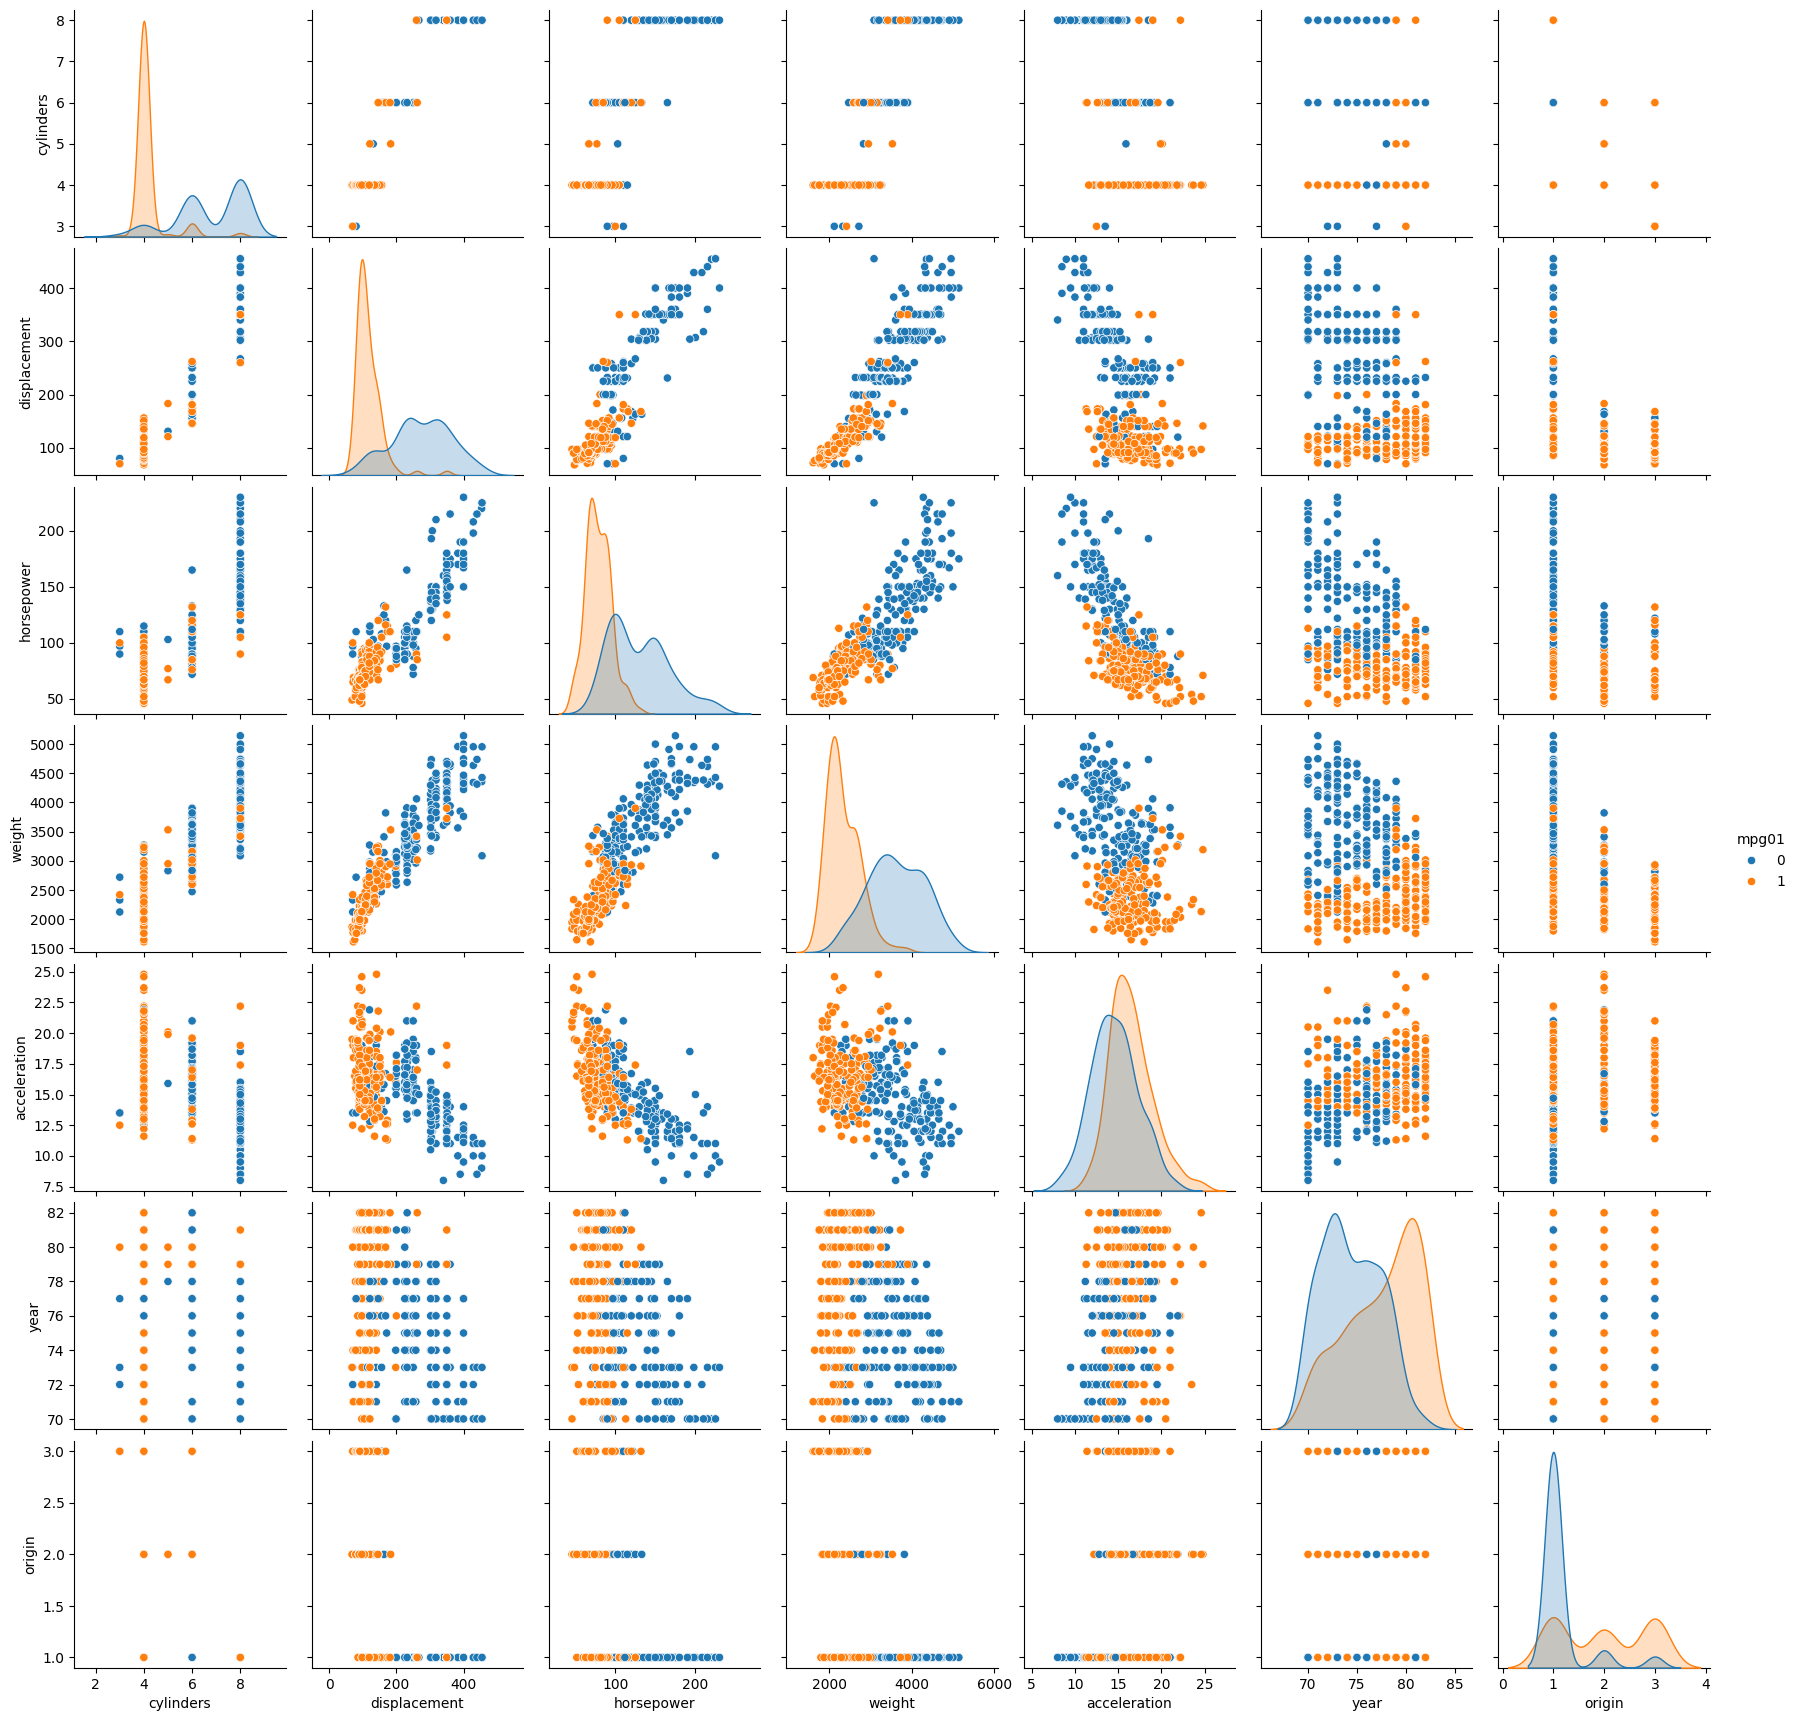

In [ ]:
sns.pairplot(data, vars=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration','year', 'origin'], hue='mpg01')

We do the scatter plot for variables seperately.

Keeping 'mpg01' as the interest, we see that the variables
1. displacement and horsepower
2. displacement and weight
3. horsepower and weight

appear to have a strong postive relationship.

4. horsepower and acceleration
5. acceleration and displacement
3. weight and acceleration

appear to have a polynomail relationship.

<Axes: >

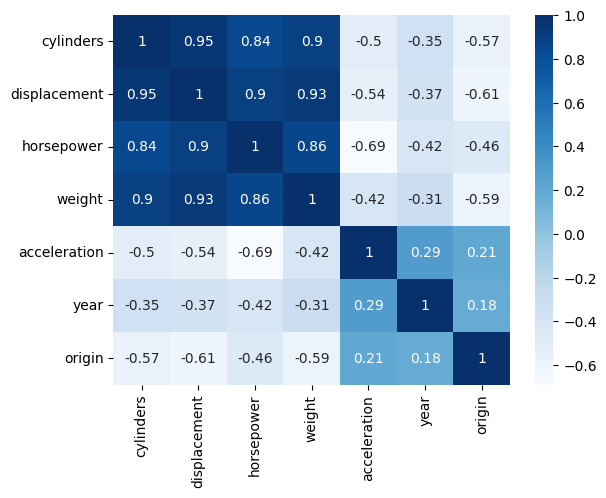

In [ ]:
numeric_cols = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
data_numeric = data[numeric_cols]
sns.heatmap(data_numeric.corr(), annot=True, cmap="Blues")

From the correlation matrix we see that

1. mpg with cylinders, displacement, horsepower, weight appear to have a strong negative relationship.
2. cylinders with displacement, horsepower and weight appear to have a strong positive relationship.
3. displacement with horsepower and weight appear to have a strong positive relationship.
4. horsepower with weight has a strong positive relationship.
5. weight appears to have a strong negative relationship with mpg01.

## ***Split the data into a training set and a test set.***

In [ ]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

## ***Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (2). What is the test error of the model obtained?***

We need to note that all the variables appear to be most associated with mpg01. So we have considered all the vraibles. We draw this conclusion from scatter plot or correlation matrix [heatmap].

In [ ]:
from sklearn.linear_model import LogisticRegression

X_lr = train[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year','origin']]
y_lr = train['mpg01']

X_train,X_test,y_train,y_test = train_test_split(X_lr,y_lr,test_size=0.25,random_state=0)


LR= LogisticRegression()
LR.fit(X_train,y_train)
y_pred_lr = LR.predict(X_test)

print('Confusion Matrix:\n ',confusion_matrix(y_test,y_pred_lr))
print('Classification Report:\n ',classification_report(y_test,y_pred_lr))


Confusion Matrix:
  [[40  5]
 [ 5 27]]
Classification Report:
                precision    recall  f1-score   support

           0       0.89      0.89      0.89        45
           1       0.84      0.84      0.84        32

    accuracy                           0.87        77
   macro avg       0.87      0.87      0.87        77
weighted avg       0.87      0.87      0.87        77



The accuracy of the model is 87%.

From the confusion matrix we infer:

The true positive is 27, that is, 27 miles per gallon[mpg] are above the median and are correctly predicted to be above the median.

The false positive is 5, that is, 5 mpg are below the median and are wrongly predicted to be above the median.

The false negative is 5, that is, 5 mpg are above the median but are wrongly predicted to be below the median.

The true negative is 40, that is, 40 mpg are below the median and are correctly predicted to be below the median.

## ***Perform naive Bayes on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (2). What is the test error of the model obtained?***

We need to note that all the variables appear to be most associated with mpg01. So we have considered all the vraibles. We draw this conclusion from scatter plot or correlation matrix [heatmap].

In [ ]:
from sklearn.naive_bayes import GaussianNB

X_knn = train[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year','origin']]
y_knn = train['mpg01']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size = 0.25, random_state=0)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on dataset which model has not seen before
gnb_pred= gnb.predict(X_test)

print('Confusion Matrix:\n ',confusion_matrix(y_test,gnb_pred))
print('Classification Report:\n ',classification_report(y_test,gnb_pred))

error=(y_test-gnb_pred)
print("Error of the model:\n",error)

Confusion Matrix:
  [[39  6]
 [ 2 30]]
Classification Report:
                precision    recall  f1-score   support

           0       0.95      0.87      0.91        45
           1       0.83      0.94      0.88        32

    accuracy                           0.90        77
   macro avg       0.89      0.90      0.89        77
weighted avg       0.90      0.90      0.90        77

Error of the model:
 353    0
80    -1
331    0
272    0
202    0
      ..
128    0
307    1
36     0
134    0
25     0
Name: mpg01, Length: 77, dtype: int64


The accuracy of the model is 90%.

From the confusion matrix we infer:

The true positive is 30, that is, 30 miles per gallon[mpg] are above the median and are correctly predicted to be above the median.

The false positive is 6, that is, 6 mpg are below the median and are wrongly predicted to be above the median.

The false negative is 2, that is, 2 mpg are above the median but are wrongly predicted to be below the median.

The true negative is 39, that is, 39 mpg are below the median and are correctly predicted to be below the median.

In [ ]:
error.head(10)

353    0
80    -1
331    0
272    0
202    0
28     0
290    0
114    0
347    0
315    0
Name: mpg01, dtype: int64

The error of the first 10 observations is displayed above.

## ***Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (2). What test errors do you obtain? Which value of K seems to perform the best on this data set?***

We need to note that all the variables appear to be most associated with mpg01. So we have considered all the vraibles. We draw this conclusion from scatter plot or correlation matrix [heatmap].

In [ ]:
X_knn = train[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year','origin']]
y_knn = train['mpg01']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size = 0.25, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

# Predict on dataset which model has not seen before
knn_pred= knn.predict(X_test)

print('Confusion Matrix:\n ',confusion_matrix(y_test,knn_pred))
print('Classification Report:\n ',classification_report(y_test,knn_pred))

Confusion Matrix:
  [[39  6]
 [ 4 28]]
Classification Report:
                precision    recall  f1-score   support

           0       0.91      0.87      0.89        45
           1       0.82      0.88      0.85        32

    accuracy                           0.87        77
   macro avg       0.87      0.87      0.87        77
weighted avg       0.87      0.87      0.87        77



***For k=1***

The accuracy of the model is 87%.

From the confusion matrix we infer:

The true positive is 28, that is, 28 miles per gallon[mpg] are above the median and are correctly predicted to be above the median.

The false positive is 6, that is, 6 mpg are below the median and are wrongly predicted to be above the median.

The false negative is 4, that is, 4 mpg are above the median but are wrongly predicted to be below the median.

The true negative is 39, that is, 39 mpg are below the median and are correctly predicted to be below the median.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

# Predict on dataset which model has not seen before
knn_pred= knn.predict(X_test)

print('Confusion Matrix:\n ',confusion_matrix(y_test,knn_pred))
print('Classification Report:\n ',classification_report(y_test,knn_pred))

Confusion Matrix:
  [[39  6]
 [ 7 25]]
Classification Report:
                precision    recall  f1-score   support

           0       0.85      0.87      0.86        45
           1       0.81      0.78      0.79        32

    accuracy                           0.83        77
   macro avg       0.83      0.82      0.83        77
weighted avg       0.83      0.83      0.83        77



***For k=10***

Here the accuracy is 83%.

From the confusion matrix we infer:

The true positive is 25, that is, 25 miles per gallon[mpg] are above the median and are correctly predicted to be above the median.

The false positive is 6, that is, 6 mpg are below the median and are wrongly predicted to be above the median.

The false negative is 7, that is, 7 mpg are above the median but are wrongly predicted to be below the median.

The true negative is 39, that is, 39 mpg are below the median and are correctly predicted to be below the median.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=50)

knn.fit(X_train, y_train)

# Predict on dataset which model has not seen before
knn_pred= knn.predict(X_test)

print('Confusion Matrix:\n ',confusion_matrix(y_test,knn_pred))
print('Classification Report:\n ',classification_report(y_test,knn_pred))

Confusion Matrix:
  [[38  7]
 [ 6 26]]
Classification Report:
                precision    recall  f1-score   support

           0       0.86      0.84      0.85        45
           1       0.79      0.81      0.80        32

    accuracy                           0.83        77
   macro avg       0.83      0.83      0.83        77
weighted avg       0.83      0.83      0.83        77



***For k=50***

The accuracy of the model is 83%.

From the confusion matrix we infer:

The true positive is 26, that is, 26 miles per gallon[mpg] are above the median and are correctly predicted to be above the median.

The false positive is 7, that is, 7 mpg are below the median and are wrongly predicted to be above the median.

The false negative is 6, that is, 6 mpg are above the median but are wrongly predicted to be below the median.

The true negative is 38, that is, 38 mpg are below the median and are correctly predicted to be below the median.

## ***Conclusion for which k-value is better***

We see that as the k-value increases we see a fluctuation in the accuracy.

Even thought for k=1 we have an accuracy of 87%, the variability incraeses.

So we say k=50 is likely to perform well for this dataset with an accuracy of 83%.